# Projeto ai

In [1]:
import pandas as pd
import numpy as np

In [2]:
detran19 = pd.read_csv('datatran2019.csv', delimiter=";")
detran20 = pd.read_csv('datatran2020.csv', delimiter=";")

# Tafera 2 

## a)

In [22]:
list(detran19.count())[0]

67446

In [23]:
list(detran20.count())[0]

34084

## b)

In [24]:
detran19.head(1)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,182210.0,2019-01-01,ter�a-feira,01:30:00,SP,116.0,218,GUARULHOS,Falta de Aten��o � Condu��o,Colis�o com objeto est�tico,...,0,0,0,4,1,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP


In [25]:
detran20.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,260031,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Animais na Pista,Atropelamento de Animal,...,5,0,0,5,1,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN
1,260036,2020-01-01,quarta-feira,01:00:00,RJ,116.0,178,NOVA IGUACU,Falta de Aten��o do Pedestre,Atropelamento de Pedestre,...,0,1,0,0,1,"-22,75223028","-43,4379103",SR-RJ,DEL5/1,UOP02/RJ
2,260037,2020-01-01,quarta-feira,01:52:00,SC,101.0,"206,9",SAO JOSE,Ingest�o de �lcool,Colis�o lateral,...,0,1,0,1,2,"-27,59193546","-48,61824557",SR-SC,DEL8/1,UOP01/SC
3,260038,2020-01-01,quarta-feira,01:15:00,RO,364.0,236,CACOAL,Velocidade Incompat�vel,Sa�da de leito carro��vel,...,1,0,0,1,1,"-11,44624577","-61,43761218",SR-RO,DEL21/2,UOP02/RO
4,260039,2020-01-01,quarta-feira,01:30:00,PR,153.0,360,REBOUCAS,Ingest�o de �lcool,Capotamento,...,4,0,0,6,1,"-25,67503796","-50,75089805",SR-PR,DEL7/3,UOP04/PR


# c)

In [30]:
detran19['municipio'].value_counts().head(5)

CURITIBA     1094
BRASILIA     1090
SAO JOSE      819
GUARULHOS     717
SERRA         633
Name: municipio, dtype: int64

In [31]:
detran20['municipio'].value_counts().head(5)

BRASILIA     582
CURITIBA     540
SAO JOSE     339
PALHOCA      329
GUARULHOS    327
Name: municipio, dtype: int64

## d)

In [37]:
list(detran19[detran19['uf'] == 'PB'].count())[0]

1564

## Tarefa 3

In [16]:
acidentes19_20 = pd.concat([detran19, detran20], join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

### a)

In [22]:
#acidentes19_20['uf'].value_counts()
acidentes19_20['uf'].value_counts().head(5)

MG    13132
SC    12506
PR    11648
RS     6920
RJ     6794
Name: uf, dtype: int64

### b)

In [25]:
acidentes19_20['dia_semana'].value_counts()

domingo          16702
s�bado           16587
sexta-feira      15773
segunda-feira    13644
quinta-feira     13307
quarta-feira     12868
ter�a-feira      12649
Name: dia_semana, dtype: int64

## Tarefa 4

### a)

In [46]:
maior_causa_19 = detran19['causa_acidente'].value_counts().index[0]
menor_causa_19 = detran19['causa_acidente'].value_counts().index[-1]

maior_causa_20 = detran20['causa_acidente'].value_counts().index[0]
menor_causa_20 = detran20['causa_acidente'].value_counts().index[-1]

In [47]:
print(f"""
    Em 2019,
    a maior causa foi {maior_causa_19}
    enquanto a menor foi {menor_causa_19}
    
    Já em 2020,
    a maior causa foi {maior_causa_20}
    enquanto a menor foi {menor_causa_20}
""")


    Em 2019,
    a maior causa foi Falta de Aten��o � Condu��o
    enquanto a menor foi Ingest�o de Subst�ncias Psicoativas
    
    Já em 2020,
    a maior causa foi Falta de Aten��o � Condu��o
    enquanto a menor foi Ingest�o de Subst�ncias Psicoativas



### b)

In [4]:
import calendar

In [5]:
detran19['mes'] = list(map(lambda x: calendar.month_name[int(x[5:7])], list(detran19['data_inversa'])))
detran20['mes'] = list(map(lambda x: calendar.month_name[int(x[5:7])], list(detran20['data_inversa'])))

In [6]:
detran19.set_index('mes', inplace=True)
detran20.set_index('mes', inplace=True)

In [7]:
detran19_n1 = detran19.groupby('mes')[['ilesos', 'feridos_graves', 'feridos_leves']].sum()
detran19_n2 = detran19.groupby('mes')['pessoas'].sum()

detran20_n1 = detran20.groupby('mes')[['ilesos', 'feridos_graves', 'feridos_leves']].sum()
detran20_n2 = detran20.groupby('mes')['pessoas'].sum()

In [10]:
final_detran19 = pd.DataFrame((np.array(detran19_n1.sum(axis=1).values) / detran19_n2.values) * 100)
final_detran19['mes'] = sorted(list(detran19.index.unique()))
final_detran19.set_index('mes', inplace=True)

final_detran20 = pd.DataFrame((np.array(detran20_n1.sum(axis=1).values) / detran20_n2.values) * 100)
final_detran20['mes'] = sorted(list(detran20.index.unique()))
final_detran20.set_index('mes', inplace=True)

In [19]:
final_detran19

,0
mes,
April,90.799844
August,90.611728
December,91.190247
February,91.584033
January,91.999085
July,90.803154
June,90.545075
March,91.473211
May,90.449394


In [178]:
final_detran20

,0
mes,
April,88.784042
February,91.082948
January,91.594966
July,88.985908
June,89.011516
March,89.329863
May,88.581659


### c)

In [11]:
detran19_idx = list(final_detran19.index)
detran20_idx = list(final_detran20.index)

matched_indexes = list(filter(lambda x: x in detran20_idx, detran19_idx))

In [223]:
mydata = pd.DataFrame(
    {'19':list(map(lambda x: x[0], final_detran19.loc[matched_indexes].values)), 
     '20': list(map(lambda x: x[0], final_detran20.values)), 'mes': matched_indexes})
mydata.set_index('mes', inplace=True)

In [224]:
mydata

,19,20
mes,,
April,90.799844,88.784042
February,91.584033,91.082948
January,91.999085,91.594966
July,90.803154,88.985908
June,90.545075,89.011516
March,91.473211,89.329863
May,90.449394,88.581659


In [12]:
d19 = detran19.loc[matched_indexes, 'pessoas':].groupby('mes').sum()

In [13]:
d20 = detran20.loc[:, 'pessoas':].groupby('mes').sum()

In [15]:
d19_20 = d20 - d19

In [16]:
d19_20

,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
mes,,,,,,,,
April,-4443,-38,-1657,-373,-2173,-202,-2030,-2968
February,1378,-8,459,206,531,190,665,832
January,952,4,511,25,283,129,536,579
July,-2764,-34,-950,-424,-1346,-10,-1374,-1425
June,-2991,-102,-1179,-425,-1264,-21,-1604,-1635
March,-2810,-16,-893,-349,-1559,7,-1242,-1638
May,-2741,-85,-1011,-384,-1272,11,-1395,-1754


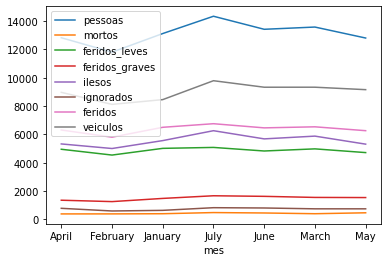

In [17]:
d19.plot.line()